OBJECTIVE:

1. Build a model to Understand the sentiment - Positive/Negative
2. Pick out the most important words in the reviews - Topic Modelling
3. Item similarity to show the most relevant product and review to the user

In [3]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 5.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ce928fd8c55ba18701d1146e267709eb6c64f2be4d13d15069570136ec25c660
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [4]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import time
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import spacy
from datetime import datetime
import nltk
import tqdm
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
tqdm.pandas() # Import tqdm.pandas explicitly
pd.set_option('display.max_colwidth', None)
from sklearn.preprocessing import MinMaxScaler
from numpy import *

In [3]:
# connect with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/My Drive/Data/sample30.csv'

In [5]:
df = pd.read_csv(file_path)

In [ ]:
df.describe()

reviews_rating
count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

# Exploratory data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
#Data attribute
attribute_file_path = '/content/drive/My Drive/Data/Data+Attribute+Description.csv'
att_df = pd.read_csv(attribute_file_path)
att_df.head(15)

Attribute  \
0                     id   
1                  brand   
2             categories   
3           manufacturer   
4                   name   
5           reviews_date   
6    reviews_didPurchase   
7    reviews_doRecommend   
8         reviews_rating   
9           reviews_text   
10         reviews_title   
11      reviews_userCity   
12  reviews_userProvince   
13      reviews_username   
14        user_sentiment   

                                                                                                                                                                                                    Attribute Description  
0                                                                                                         Uniques identity number to identify each unique review given by the user to a particular product in the dataset  
1                                                                                                                                              Name of the brand of the product to which user has given review and rating  
2   Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.  
3                                                                                                                                                                                 Name of the manufacturer of the product  
4                                                                                                                                                            Name of the product to which user has added review or rating  
5                                                                                                                                                                     Date on which the review has been added by the user  
6                                                                                                                                                              Whether a particular user has purchased the product or not  
7                                                                                                                                                            Whether a particular user has recommended the product or not  
8                                                                                                                                                                        Rating given by the user to a particular product  
9                                                                                                                                                                        Review given by the user to a particular product  
10                                                                                                                                                      The title of the review given by the user to a particular product  
11                                                                                                                                                                                          The residing city of the user  
12                                                                                                                                                                                      The residing province of the user  
13                                                                                                                                                           The unique identification for individual user in the dataset  
14                                                                                                                                      The overall sentiment of the user for a particular product (Positive or Negative)

In [ ]:
def count_plot(dataframe, list_of_columns):
     final_plot = []
     for eachcol in list_of_columns:
         plt.figure(figsize=(15,5))
         unique_features = dataframe[eachcol].unique()
         if dataframe[eachcol].dtype =='int64':
             unique_features=sorted(unique_features)
         sns.countplot(x=eachcol, data=dataframe , order = unique_features)
         plt.xlabel(eachcol)
         plt.ylabel('Count')
         plt.title("Frequency plot of {} Count".format(eachcol))
         plt.show()

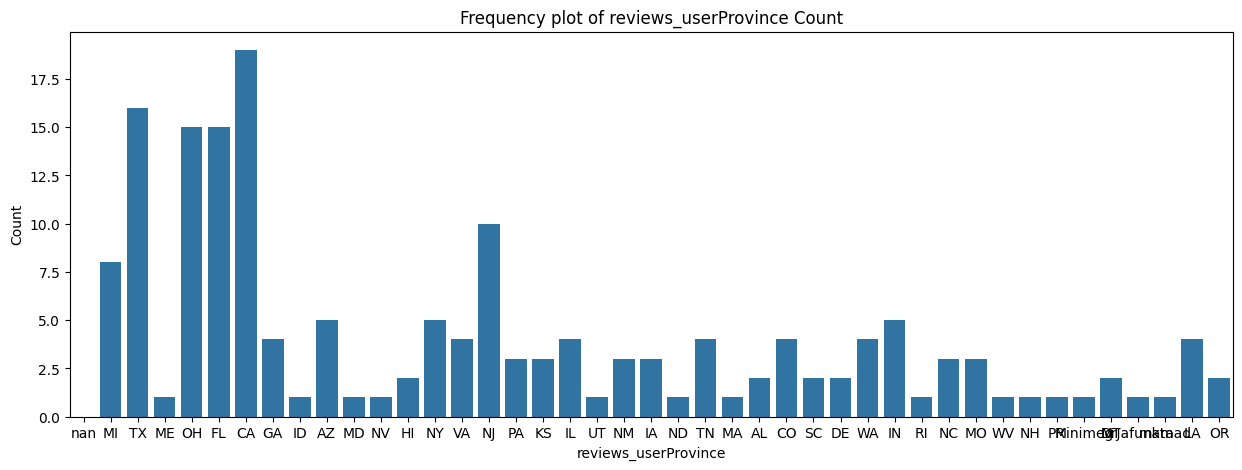

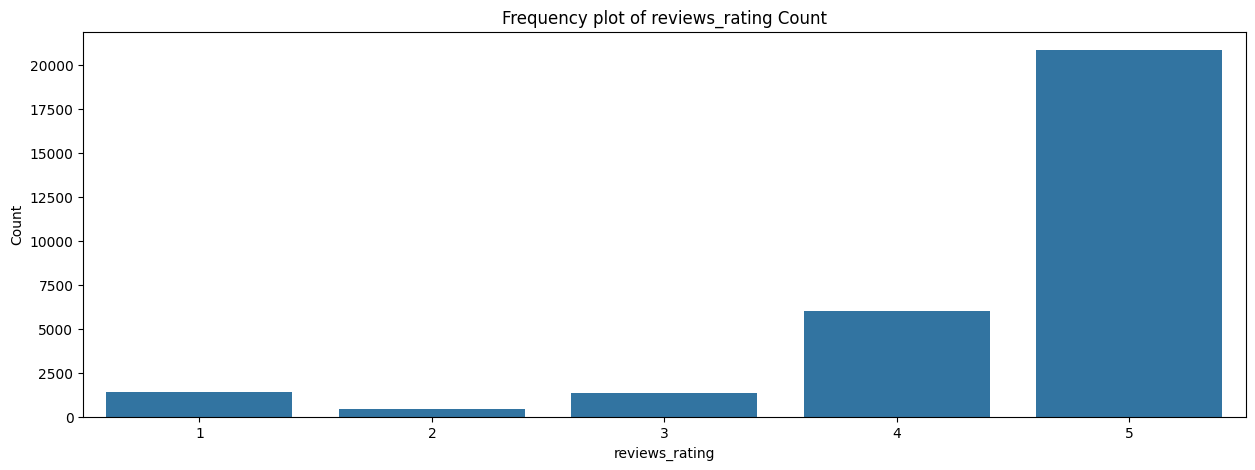

In [ ]:
count_plot(df,["reviews_userProvince","user_sentiment","reviews_rating"])

From the above graphs we can see that user province seems to be spread out but the ratings are skewed towards 4 and 5 while the sentiment is largely positive.

In [ ]:
profile = ProfileReport(df, title="Data Summary Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We have the following observations and actions from the data:



1. Convert the **reviews_date** column to date type column
2. Convert int64 column to int8 as ratings values are always between 0 and 5
3. **reviews_date** is missing 46 values, we will handle the missing value by replacing it with ***most frequent value***. we will also expand this into year, month and date.
4. **reviews_did_purchase** has 14068 missing values, the data is also heavily skewed towards No. We will replace the missing value with ***False***
5. **reviews_doReccommend** has 2570 missing values and data is skewed, we will replace the missing value with "***No Answer***"
6. **reviews_title** has 190 missing values, we will ***leave it blank***
7. **reviews_userCity** has 28071 missing values. We will replace the missing values with "***Not Available***"
8. **reviews_userProvince** has 29830 missing values, will be replaced with "***Not Available***"
9. **reviews_username** has 63 missing values and will be ***left as is***
10. **user_sentiment** has one missing value, we will ***drop*** that column


# Data cleaning

1. CONVERT reviews_date column to date_time type and expand to month, day and year

In [6]:
df = pd.read_csv(file_path)

In [7]:
value = df["reviews_date"].mode().iloc[0]
print(value)
df["reviews_date"] = df["reviews_date"].fillna(value)

2012-01-26T00:00:00.000Z


In [8]:
df_clean = df.copy()
df_clean["reviews_date"] = df_clean["reviews_date"].astype('str')
df_clean["reviews_date"] = pd.to_datetime(df_clean["reviews_date"],format='ISO8601', errors='coerce')
#Extracting the date time year component
df_clean["reviews_date_year"] = pd.DatetimeIndex(df_clean["reviews_date"]).year
#Extracting the date time year component
df_clean["reviews_date_month"] = pd.DatetimeIndex(df_clean["reviews_date"]).month
#Extracting the date time year component
df_clean["reviews_date_day"] = pd.DatetimeIndex(df_clean["reviews_date"]).day_name()
df_clean = df_clean.drop(columns=["reviews_date"], axis=1)

In [9]:
value = df_clean["reviews_date_year"].mode().iloc[0]
df_clean["reviews_date_year"] = df_clean["reviews_date_year"].fillna(value)
df_clean["reviews_date_year"] = df_clean["reviews_date_year"].astype(np.int16)

value = df_clean["reviews_date_month"].mode().iloc[0]
df_clean["reviews_date_month"] = df_clean["reviews_date_month"].fillna(value)
df_clean["reviews_date_month"] = df_clean["reviews_date_month"].astype(np.int8)

value = df_clean["reviews_date_day"].mode().iloc[0]
df_clean["reviews_date_day"] = df_clean["reviews_date_day"].fillna(value)

df_clean["reviews_rating"] = df_clean["reviews_rating"].astype(np.int8)

In [10]:
df_clean["reviews_didPurchase"] = df_clean["reviews_didPurchase"].fillna("False")
df_clean["reviews_doRecommend"] = df_clean["reviews_doRecommend"].fillna("No Answer")
df_clean["reviews_userCity"] = df_clean["reviews_userCity"].fillna("Not Available")
df_clean["reviews_userProvince"] = df_clean["reviews_userProvince"].fillna("Not Available")
df_clean["reviews_title"] = df_clean["reviews_title"].fillna("")
df_clean = df_clean.dropna(subset=["user_sentiment"])

In [11]:
pd.DataFrame({'%missing_values':round(df_clean.isna().sum()/df_clean.shape[0],2)})

%missing_values
id                                0.0
brand                             0.0
categories                        0.0
manufacturer                      0.0
name                              0.0
reviews_didPurchase               0.0
reviews_doRecommend               0.0
reviews_rating                    0.0
reviews_text                      0.0
reviews_title                     0.0
reviews_userCity                  0.0
reviews_userProvince              0.0
reviews_username                  0.0
user_sentiment                    0.0
reviews_date_year                 0.0
reviews_date_month                0.0
reviews_date_day                  0.0


# Text preprocessing

In [12]:
# function here to clean the text and remove all the unnecessary elements.
import re
import string
def clean_text(text):
  text = re.sub('X+', '', text)
  text = re.sub('//', '', text)
  text = text.lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  return text

In [13]:
# clean the text
df_clean['reviews_title'] = df_clean['reviews_title'].apply(lambda x: clean_text(x))
df_clean['reviews_text'] = df_clean['reviews_text'].apply(lambda x: clean_text(x))

In [14]:
# function to Lemmatize the texts
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  return lemmatizer.lemmatize(text)

In [15]:
#Creating a separate dataframe for lemmatized text and sentiment for training
df_lemmatized = df_clean[['id','reviews_text','user_sentiment','reviews_rating']]

In [16]:
# lemmatize the text
df_lemmatized['lemmatize_reviews'] = df_lemmatized['reviews_text'].apply(lambda x: lemmatize_text(x))
df_lemmatized.drop(columns=['reviews_text'], inplace=True)

/tmp/ipython-input-16-342185886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lemmatized['lemmatize_reviews'] = df_lemmatized['reviews_text'].apply(lambda x: lemmatize_text(x))
/tmp/ipython-input-16-342185886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lemmatized.drop(columns=['reviews_text'], inplace=True)


In [17]:
df_lemmatized.head()

id user_sentiment  reviews_rating  \
0  AV13O1A8GV-KLJ3akUyj       Positive               5   
1  AV14LG0R-jtxr-f38QfS       Positive               5   
2  AV14LG0R-jtxr-f38QfS       Positive               5   
3  AV16khLE-jtxr-f38VFn       Negative               1   
4  AV16khLE-jtxr-f38VFn       Negative               1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  lemmatize_reviews  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it  rating all the way her metaphors are just crazy  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      good flavor this review was collected as part of a promotion  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       good flavor  
3  i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation we had both been expecting im disappointed that i paid as much as i did for a lube that i wont use again when i could just use their normal personal lubricant for  less money and  less mess  
4                                                                                                                                                                                                                                                                                         

#Comparing different vectorizer performances
1. TF-IDF, Count-Vectorizer, Hashing Vectorizer
2. Word2Vec

##### TF-IDF

In [180]:
# initialise the TfidfVectorizer
#vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Exclude negation words
custom_stopwords = ENGLISH_STOP_WORDS.difference({"not", "no", "don't", "isn't", "aren't", "wasn't", "weren't", "couldn't", "won't", "wouldn't"})

# Convert the frozenset to a list
custom_stopwords_list = list(custom_stopwords)

vectorizer = TfidfVectorizer(
    stop_words=custom_stopwords_list,
    ngram_range=(1, 2),  # Helps capture "not good", "don't like"
    max_df=0.95,
    min_df=5,
    max_features=5000
)

In [181]:
# create document term matrix
doc_term_mat = vectorizer.fit_transform(df_lemmatized['lemmatize_reviews'])

In [182]:
# content of document term matrix along with the complaint id
pd.DataFrame(doc_term_mat.toarray(), columns=vectorizer.get_feature_names_out(), index=df_clean['id'])

ability  able  able clean  able use  absolute  \
id                                                                    
AV13O1A8GV-KLJ3akUyj      0.0   0.0         0.0       0.0       0.0   
AV14LG0R-jtxr-f38QfS      0.0   0.0         0.0       0.0       0.0   
AV14LG0R-jtxr-f38QfS      0.0   0.0         0.0       0.0       0.0   
AV16khLE-jtxr-f38VFn      0.0   0.0         0.0       0.0       0.0   
AV16khLE-jtxr-f38VFn      0.0   0.0         0.0       0.0       0.0   
...                       ...   ...         ...       ...       ...   
AVpfW8y_LJeJML437ySW      0.0   0.0         0.0       0.0       0.0   
AVpfW8y_LJeJML437ySW      0.0   0.0         0.0       0.0       0.0   
AVpfW8y_LJeJML437ySW      0.0   0.0         0.0       0.0       0.0   
AVpfW8y_LJeJML437ySW      0.0   0.0         0.0       0.0       0.0   
AVpfW8y_LJeJML437ySW      0.0   0.0         0.0       0.0       0.0   

                      absolute favorite  absolutely  absolutely amazing  \
id                                                                        
AV13O1A8GV-KLJ3akUyj                0.0         0.0                 0.0   
AV14LG0R-jtxr-f38QfS                0.0         0.0                 0.0   
AV14LG0R-jtxr-f38QfS                0.0         0.0                 0.0   
AV16khLE-jtxr-f38VFn                0.0         0.0                 0.0   
AV16khLE-jtxr-f38VFn                0.0         0.0                 0.0   
...                                 ...         ...                 ...   
AVpfW8y_LJeJML437ySW                0.0         0.0                 0.0   
AVpfW8y_LJeJML437ySW                0.0         0.0                 0.0   
AVpfW8y_LJeJML437ySW                0.0         0.0                 0.0   
AVpfW8y_LJeJML437ySW                0.0         0.0                 0.0   
AVpfW8y_LJeJML437ySW                0.0         0.0                 0.0   

                      absolutely love  absolutely loved  ...  youthful  youve  \
id                                                       ...                    
AV13O1A8GV-KLJ3akUyj              0.0               0.0  ...       0.0    0.0   
AV14LG0R-jtxr-f38QfS              0.0               0.0  ...       0.0    0.0   
AV14LG0R-jtxr-f38QfS              0.0               0.0  ...       0.0    0.0   
AV16khLE-jtxr-f38VFn              0.0               0.0  ...       0.0    0.0   
AV16khLE-jtxr-f38VFn              0.0               0.0  ...       0.0    0.0   
...                               ...               ...  ...       ...    ...   
AVpfW8y_LJeJML437ySW              0.0               0.0  ...       0.0    0.0   
AVpfW8y_LJeJML437ySW              0.0               0.0  ...       0.0    0.0   
AVpfW8y_LJeJML437ySW              0.0               0.0  ...       0.0    0.0   
AVpfW8y_LJeJML437ySW              0.0               0.0  ...       0.0    0.0   
AVpfW8y_LJeJML437ySW              0.0               0.0  ...       0.0    0.0   

                       yr  yr old  yrs  yucky  yummy  zac  zac efron  zombie  
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AV14LG0R-jtxr-f38QfS  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AV14LG0R-jtxr-f38QfS  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AV16khLE-jtxr-f38VFn  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AV16khLE-jtxr-f38VFn  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
...                   ...     ...  ...    ...    ...  ...        ...     ...  
AVpfW8y_LJeJML437ySW  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AVpfW8y_LJeJML437ySW  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AVpfW8y_LJeJML437ySW  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AVpfW8y_LJeJML437ySW  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  
AVpfW8y_LJeJML437ySW  0.0     0.0  0.0    0.0    0.0  0.0        0.0     0.0  

[29999 rows x 5000 columns]

To get a more fine grained user sentiment we will be converting rating to sentiment. I also noticed that some of the sentiments have been mis-classified as positive for very low rating

In [183]:
train_data = df_lemmatized[['lemmatize_reviews', 'user_sentiment']]
train_data.head()

lemmatize_reviews  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it  rating all the way her metaphors are just crazy   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      good flavor this review was collected as part of a promotion   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       good flavor   
3  i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation we had both been expecting im disappointed that i paid as much as i did for a lube that i wont use again when i could just use their normal personal lubricant for  less money and  less mess   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel   

  user_sentiment  
0       Positive  
1       Positive  
2       Positive  
3       Negative  
4       Negative

In [184]:
# create X and y
#X = doc_term_mat
X = df_lemmatized['lemmatize_reviews']
y = df_lemmatized['user_sentiment']

In [185]:
# check class balance
y.value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

In [186]:
# split into train and test
# We will use stratify y to ensure proper balance of 'yes' and 'no' in the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

The negative cases are very low compared to positive cases, so there is a class imbalance here, we will fix it using smote.

#Model training and evaluation

- Logistic regression
- Decision Tree
- Random Forest
- Naive Bayes
- XgBoost

In [187]:
# utility to train the model
def train_model(params, estimator, X_tr, y_tr):
  # define grid search
  grid_search = GridSearchCV(estimator=estimator, param_grid=params, scoring='f1_weighted', cv=4, n_jobs=-1)

  # fit data into grid search
  grid_search.fit(X_tr, y_tr)

  # return best model
  print('Best Params:')
  print(grid_search.best_params_)
  return grid_search.best_estimator_

In [188]:
# utility to test the model
def test_model(model, X_te, y_te):
  # predictions
  pred = model.predict(X_te)

  # accuracy
  print('Accuracy of model:', round(accuracy_score(y_te, pred), 4))

  # confusion matrix
  print('\nConfusion matrix:')
  print(confusion_matrix(y_te, pred))

  # precision
  print('\nPrecision score:', round(precision_score(y_te, pred, average='weighted'), 4))

  # recall
  print('\nRecall score:', round(recall_score(y_te, pred, average='weighted'), 4))

  # f1-score
  print('\nf1-score:', round(f1_score(y_te, pred, average='weighted'), 4))

  # roc auc score
  try:
      if hasattr(model, "predict_proba"):
          y_proba = model.predict_proba(X_te)
          if y_proba.shape[1] == 2:  # binary classification
              auc = roc_auc_score(y_te, y_proba[:, 1])
          else:  # multiclass
              auc = roc_auc_score(y_te, y_proba, multi_class='ovr', average='weighted')
          print('\nROC AUC score:', round(auc, 4))
      else:
          print('\nROC AUC score: Not available (model does not support predict_proba)')
  except Exception as e:
      print(f'\nROC AUC score: Error computing AUC - {str(e)}')


##Model Training with TF-IDF Vectorizer

### Logistic Regression

In [189]:
# define params
hyper_params = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1.0],
    'clf__max_iter': [100, 200, 300],
    'clf__solver': ['saga']
}

# 2. Define pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(multi_class='multinomial'))
])

# train the model
model = train_model(hyper_params, pipeline, X_train, y_train)

# eval model on train set
print('\n******** Evaluation on train data ********')
test_model(model, X_train, y_train)

print('\n')

# eval model on test set
print('******** Evaluation on test data ********')
test_model(model, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Best Params:
{'clf__C': 1.0, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}

******** Evaluation on train data ********
Accuracy of model: 0.9524

Confusion matrix:
[[ 2550   144]
 [  999 20306]]

Precision score: 0.9622

Recall score: 0.9524

f1-score: 0.9551

ROC AUC score: 0.9866


******** Evaluation on test data ********
Accuracy of model: 0.9422

Confusion matrix:
[[ 610   63]
 [ 284 5043]]

Precision score: 0.9534

Recall score: 0.9422

f1-score: 0.9456

ROC AUC score: 0.9751


### Decision Tree Classifier

In [190]:
# 1. Define parameter grid (note the prefix clf__ for pipeline step)
hyper_params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7, 11],
    'clf__min_samples_leaf': [10, 20, 30, 40],
}

# 2. Define pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=100))
])

# train the model
model = train_model(hyper_params, pipeline, X_train, y_train)

# eval model on train set
print('******** Evaluation on train data ********')
test_model(model, X_train, y_train)

print('\n')

# eval model on test set
print('******** Evaluation on test data ********')
test_model(model, X_test, y_test)

Best Params:
{'clf__criterion': 'gini', 'clf__max_depth': 11, 'clf__min_samples_leaf': 10}
******** Evaluation on train data ********
Accuracy of model: 0.7995

Confusion matrix:
[[ 2481   213]
 [ 4598 16707]]

Precision score: 0.9159

Recall score: 0.7995

f1-score: 0.833

ROC AUC score: 0.8812


******** Evaluation on test data ********
Accuracy of model: 0.7928

Confusion matrix:
[[ 604   69]
 [1174 4153]]

Precision score: 0.9114

Recall score: 0.7928

f1-score: 0.8275

ROC AUC score: 0.8562


### Random Forest Classifier

In [191]:
# define params
hyper_params = {
    'clf__n_estimators': [100, 200, 300, 400, 500],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [15, 20, 25],
    'clf__min_samples_leaf': [5, 10, 20, 30]
}

# 2. Define pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=100, n_jobs=-1))
])

# train the model
model = train_model(hyper_params, pipeline, X_train, y_train)

# eval model on train set
print('******** Evaluation on train data ********')
test_model(model, X_train, y_train)

print('\n')

# eval model on test set
print('******** Evaluation on test data ********')
test_model(model, X_test, y_test)

Best Params:
{'clf__criterion': 'gini', 'clf__max_depth': 25, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 400}
******** Evaluation on train data ********
Accuracy of model: 0.8798

Confusion matrix:
[[ 2268   426]
 [ 2458 18847]]

Precision score: 0.922

Recall score: 0.8798

f1-score: 0.8933

ROC AUC score: 0.9399


******** Evaluation on test data ********
Accuracy of model: 0.8683

Confusion matrix:
[[ 492  181]
 [ 609 4718]]

Precision score: 0.9052

Recall score: 0.8683

f1-score: 0.8815

ROC AUC score: 0.9002


### Naive Bayes *Classifier*

In [192]:
# define params
hyper_params = {
    'clf__alpha': [0.1, 0.5, 1, 2, 5]
}
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('clf', MultinomialNB())
])

# train the model
model = train_model(hyper_params, pipeline, X_train, y_train)

# eval model on train set
print('******** Evaluation on train data ********')
test_model(model, X_train, y_train)

print('\n')

# eval model on test set
print('******** Evaluation on test data ********')
test_model(model, X_test, y_test)

Best Params:
{'clf__alpha': 0.1}
******** Evaluation on train data ********
Accuracy of model: 0.8945

Confusion matrix:
[[ 2457   237]
 [ 2295 19010]]

Precision score: 0.9349

Recall score: 0.8945

f1-score: 0.9064

ROC AUC score: 0.9546


******** Evaluation on test data ********
Accuracy of model: 0.8697

Confusion matrix:
[[ 497  176]
 [ 606 4721]]

Precision score: 0.9065

Recall score: 0.8697

f1-score: 0.8827

ROC AUC score: 0.8925


### XGBoost

In [193]:
# define params
hyper_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.05, 0.1],
}
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
                          eval_metric='logloss',
                          learning_rate= 0.1,
                          max_depth= 7,
                          n_estimators= 200,
                          reg_alpha=0.5,  # L1 regularization
                          reg_lambda=1.0  # L2 regularization
                          ))
])

y_train = y_train.map({'Positive': 1, 'Negative': 0})
y_test = y_test.map({'Positive': 1, 'Negative': 0})

# train the model
model = train_model(hyper_params, pipeline, X_train, y_train)

# eval model on train set
print('******** Evaluation on train data ********')
test_model(model, X_train, y_train)

print('\n')

# eval model on test set
print('******** Evaluation on test data ********')
test_model(model, X_test, y_test)

Best Params:
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
******** Evaluation on train data ********
Accuracy of model: 0.9372

Confusion matrix:
[[ 2583   111]
 [ 1397 19908]]

Precision score: 0.9557

Recall score: 0.9372

f1-score: 0.9422

ROC AUC score: 0.9833


******** Evaluation on test data ********
Accuracy of model: 0.9178

Confusion matrix:
[[ 582   91]
 [ 402 4925]]

Precision score: 0.9381

Recall score: 0.9178

f1-score: 0.9243

ROC AUC score: 0.9598


**So far we can see that Logistic Regression performs best with TF-IDF vectorizer with f1-score of 94.5% and highest ROC AUC score of 97.5%. We will check the same model with Word2Vec vectorizer and see if this improves performance before proceeding with model**

##Model Training with Word2Vec Vectorizer

In [194]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

X = df_lemmatized['lemmatize_reviews']
y = df_lemmatized['user_sentiment']

# Tokenize your corpus
tokenized_docs = [word_tokenize(doc.lower()) for doc in X]

# Train Word2Vec model with CBOW (default)
w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, sg=0)  # sg=0 for CBOW

In [195]:
def get_doc_vector(doc, model):
    words = [w for w in word_tokenize(doc.lower()) if w in model.wv and w not in custom_stopwords_list]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)

X_vectors = np.array([get_doc_vector(doc, w2v_model) for doc in X])

In [196]:
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

hyper_params = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1.0],
    'clf__max_iter': [100, 200, 300],
    'clf__solver': ['saga']
}

# 2. Define pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(multi_class='multinomial'))
])

y_train_xg = y_train.map({'Positive': 1, 'Negative': 0})
y_test_xg = y_test.map({'Positive': 1, 'Negative': 0})

# train the model
model = train_model(hyper_params, pipeline, X_train_vec, y_train_xg)

# eval model on train set
print('******** Evaluation on train data ********')
test_model(model, X_train_vec, y_train_xg)

print('\n')

# eval model on test set
print('******** Evaluation on test data ********')
test_model(model, X_test_vec, y_test_xg)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Best Params:
{'clf__C': 1.0, 'clf__max_iter': 300, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
******** Evaluation on train data ********
Accuracy of model: 0.8067

Confusion matrix:
[[ 2349   365]
 [ 4273 17012]]

Precision score: 0.9084

Recall score: 0.8067

f1-score: 0.8374

ROC AUC score: 0.9036


******** Evaluation on test data ********
Accuracy of model: 0.8078

Confusion matrix:
[[ 563   90]
 [1063 4284]]

Precision score: 0.9105

Recall score: 0.8078

f1-score: 0.8392

ROC AUC score: 0.9053


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**So far we can see that Logistic Regression performs best with TF-IDF vectorizer with f1-score of ~95%.It is also important for us to recognize the negative sentiment correctly to prevent reccomending bad products. The Logistic Regression model has a low False Positive Rate and very comparable train and test performance, indicating that the model has learnt well**

## Final Model: Logistic Regression with TF-IDF vectorizer

In [197]:
#Best Params:
#{'clf__C': 1.0, 'clf__max_iter': 200, 'clf__penalty': 'l1', 'clf__solver': 'saga'}

#Define pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(
        penalty='l1',
        C=1.0,
        max_iter=200,
        solver='saga',
        multi_class='multinomial'
    ))
])

y_train_xg = y_train.map({'Positive': 1, 'Negative': 0})
y_test_xg = y_test.map({'Positive': 1, 'Negative': 0})

# Fit the final model
pipeline.fit(X_train, y_train_xg)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=5000, min_df=5,
                                 ngram_range=(1, 2),
                                 stop_words=['can', 'them', 'almost', 'whether',
                                             'however', 'etc', 'who',
                                             'interest', 'beyond', 'thick',
                                             'next', 'else', 'been', 'since',
                                             'by', 'give', 'my', 'every',
                                             'still', 'when', 'together',
                                             'becoming', 'full', 'its',
                                             'enough', 'three', 'upon', 'to',
                                             'yet', 'for', ...])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(max_iter=200, multi_class='multinomial',
                                    penalty='l1', solver='saga'))])

In [198]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test_xg, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.27      0.16       653
           1       0.89      0.73      0.80      5347

    accuracy                           0.68      6000
   macro avg       0.50      0.50      0.48      6000
weighted avg       0.81      0.68      0.73      6000



In [199]:
import joblib

# Save the entire pipeline
joblib.dump(pipeline, 'lr_smote_pipeline.pkl')

['lr_smote_pipeline.pkl']

In [200]:
import joblib

lr_model = joblib.load('lr_smote_pipeline.pkl')

In [201]:
example_texts = [
    "Worst experience ever.",
    "I hate this movie.",
    "I love the product",
    "Terrible. Do not recommend.",
    "Absolutely awful. Would not buy again.",
]
print(lr_model.predict(example_texts))

[0 1 0 0 0]


The model is able to able to recognize the positive and negative sentiments correctly and we will be using this model in our reccomendation system

# RECCOMMENDATION SYSTEM

## User Based Reccomendation System - Leveraging Adjusted cosine similarity

In [18]:
df_clean.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment',
       'reviews_date_year', 'reviews_date_month', 'reviews_date_day'],
      dtype='object')

In [203]:
data = df_clean[['id', 'reviews_rating', 'reviews_username','name']]
data.head()

id  reviews_rating reviews_username  \
0  AV13O1A8GV-KLJ3akUyj               5           joshua   
1  AV14LG0R-jtxr-f38QfS               5        dorothy w   
2  AV14LG0R-jtxr-f38QfS               5        dorothy w   
3  AV16khLE-jtxr-f38VFn               1          rebecca   
4  AV16khLE-jtxr-f38VFn               1        walker557   

                                         name  
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  
1  Lundberg Organic Cinnamon Toast Rice Cakes  
2  Lundberg Organic Cinnamon Toast Rice Cakes  
3            K-Y Love Sensuality Pleasure Gel  
4            K-Y Love Sensuality Pleasure Gel

In [204]:
train, test = train_test_split(data, test_size=0.30, random_state=31)

In [205]:
print(train.shape)
print(test.shape)

(20999, 4)
(9000, 4)


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
def getUserBasedRatings(dataframe, index, columns, values):

  df_pivot = dataframe.pivot_table(
      index=index,
      columns=columns,  # or 'name'
      values=values  # or 'user_sentiment', etc.
  )


  means = df_pivot.mean(axis=0)
  adjusted_df = df_pivot.sub(means, axis=1)


  # Fill NaNs with 0 after adjustment
  adjusted_df = adjusted_df.fillna(0)

  # Compute cosine similarity on adjusted ratings
  user_adj_cos_sim = cosine_similarity(adjusted_df)
  user_adj_cos_sim_df = pd.DataFrame(user_adj_cos_sim, index=df_pivot.index, columns=df_pivot.index)

  user_sim_sum = np.abs(user_adj_cos_sim_df).sum(axis=1).values.reshape(-1, 1)
  user_predicted_ratings = np.dot(user_adj_cos_sim_df, df_pivot.fillna(0)) / user_sim_sum

  user_predicted_ratings_df = pd.DataFrame(user_predicted_ratings, index=df_pivot.index, columns=df_pivot.columns)

  return user_predicted_ratings_df

In [19]:
def scaleRating(dataframe):
  X  = dataframe.copy()
  X = X[X>0]

  scaler = MinMaxScaler(feature_range=(1, 5))
  print(scaler.fit(X))
  y = (scaler.transform(X))

  print(y)
  return y

In [20]:
def getRMSE(dataframe, y):
  # Mask where y is not NaN (we compare only where ground truth is known)
  mask = ~np.isnan(y)
  diff = dataframe - y

  # Apply mask to difference
  squared_diff = (diff[mask]) ** 2

  # Compute RMSE
  rmse = np.sqrt(np.mean(squared_diff))
  print("RMSE:", rmse)

In [215]:
user_based_prediction_df = getUserBasedRatings(train, index='reviews_username', columns='id', values='reviews_rating')
user_based_prediction_df.head()

/tmp/ipython-input-206-3182362032.py:23: RuntimeWarning: invalid value encountered in divide
  user_predicted_ratings = np.dot(user_adj_cos_sim_df, df_pivot.fillna(0)) / user_sim_sum


id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000             -0.076758   
00sab00                      -0.000903             -0.010520   
02dakota                      0.000266              0.002296   
02deuce                      -0.000266             -0.002296   
0325home                      0.000014              0.000649   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              0.000000   
02dakota                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              0.000522   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...  \
reviews_username                                              ...   
00dog3                        0.000000              0.000000  ...   
00sab00                       0.006620              0.000000  ...   
02dakota                      0.000000             -0.000767  ...   
02deuce                       0.000000              0.000767  ...   
0325home                      0.000817              0.000000  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
02dakota                      0.000144             -0.000779   
02deuce                      -0.000144              0.000779   
0325home                      0.000000              0.000000   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                        0.000000                   0.0   
00sab00                      -0.000427                   0.0   
02dakota                      0.000000                   0.0   
02deuce                       0.000000                   0.0   
0325home                      0.000009                   0.0   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.001581   
02dakota                     -0.001991              0.000475   
02deuce                       0.001991             -0.000475   
0325home                      0.000000              0.000000   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.001581   
02dakota                      0.000000              0.000475   
02deuce                       0.000000             -0

In [216]:
top_n = user_based_prediction_df.loc["00sab00"].sort_values(ascending=False).head(5)
print(top_n)
recommended_items = train[train['id'].isin(top_n.index)][['id', 'name']].drop_duplicates()

print(f"\nTop recommendations for 00sab00:")
print(recommended_items.set_index('id').loc[top_n.index])

id
AVpf3VOfilAPnD_xjpun    0.010511
AVpfov9TLJeJML43A7B0    0.009065
AVpf9UGp1cnluZ0-uITX    0.006620
AV1Ymf_rglJLPUi8II2v    0.006620
AVpf385g1cnluZ0-s0_t    0.004269
Name: 00sab00, dtype: float64

Top recommendations for 00sab00:
                                                                           name
id                                                                             
AVpf3VOfilAPnD_xjpun  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
AVpfov9TLJeJML43A7B0            Bisquick Original Pancake And Baking Mix - 40oz
AVpf9UGp1cnluZ0-uITX                  Post Bound Jumbo Album - Burgundy (11x14)
AV1Ymf_rglJLPUi8II2v                              Cars Toon: Mater's Tall Tales
AVpf385g1cnluZ0-s0_t                                     Hormel Chili, No Beans


###User Similarity Evaluation

In [217]:
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2023, 4)

In [218]:
common.head()
test_user_based_prediction_df = getUserBasedRatings(common, index='reviews_username', columns='id', values='reviews_rating')
test_user_based_prediction_df.head()

/tmp/ipython-input-206-3182362032.py:23: RuntimeWarning: invalid value encountered in divide
  user_predicted_ratings = np.dot(user_adj_cos_sim_df, df_pivot.fillna(0)) / user_sim_sum


id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            0.0              0.000000   
123charlie                         0.0              0.052101   
1943                               0.0              0.000000   
4djs                               0.0              0.000000   
50cal                              0.0              0.000000   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                       0.000000              0.000000   
123charlie                    0.000000              0.026286   
1943                         -0.029438              0.000000   
4djs                          0.001094              0.000000   
50cal                        -0.029438              0.000000   

id                AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1ZSp2uglJLPUi8IQFy  AV1h6Gu0glJLPUi8IjA_  ...  \
reviews_username                                              ...   
00sab00                            0.0                   0.0  ...   
123charlie                         0.0                   0.0  ...   
1943                               0.0                   0.0  ...   
4djs                               0.0                   0.0  ...   
50cal                              0.0                   0.0  ...   

id                AVpfozgyilAPnD_xfe0r  AVpfpM2yilAPnD_xfmDG  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpfqW4WilAPnD_xf7a_  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpfrFDZLJeJML43Bmv0  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00sab00                       0.000000                   0.0   
123charlie                    0.084879                   0.0   
1943                          0.000000                   0.0   
4djs                          0.000000                   0.0   
50cal                         0.000000                   0.0   

id                AVpfshNsLJeJML43CB8q  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0               

In [219]:
# convert into the user-product matrix.
#common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [220]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [221]:
# Finding total non-NaN value
y = scaleRating(test_user_based_prediction_df)
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

MinMaxScaler(feature_range=(1, 5))
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan 1.05970023        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan 5.                nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


22294

In [222]:
getRMSE(common_,y)

RMSE: 1.3529941054119308


## Item Based Reccommendation System - Leveraging Adjusted Cosine Similarity

In [21]:
data = df_clean[['id', 'reviews_rating', 'reviews_username','name']]
df_clean.to_csv('df_clean.csv', index=False)
data.head()

id  reviews_rating reviews_username  \
0  AV13O1A8GV-KLJ3akUyj               5           joshua   
1  AV14LG0R-jtxr-f38QfS               5        dorothy w   
2  AV14LG0R-jtxr-f38QfS               5        dorothy w   
3  AV16khLE-jtxr-f38VFn               1          rebecca   
4  AV16khLE-jtxr-f38VFn               1        walker557   

                                         name  
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  
1  Lundberg Organic Cinnamon Toast Rice Cakes  
2  Lundberg Organic Cinnamon Toast Rice Cakes  
3            K-Y Love Sensuality Pleasure Gel  
4            K-Y Love Sensuality Pleasure Gel

In [22]:
train, test = train_test_split(data, test_size=0.30, random_state=31)

In [23]:
user_based_prediction_df = getUserBasedRatings(train, index='id', columns='reviews_username', values='reviews_rating')
user_based_prediction_df.head()

/tmp/ipython-input-18-3182362032.py:23: RuntimeWarning: invalid value encountered in divide
  user_predicted_ratings = np.dot(user_adj_cos_sim_df, df_pivot.fillna(0)) / user_sim_sum


reviews_username        00dog3   00sab00  02dakota   02deuce  0325home  \
id                                                                       
AV13O1A8GV-KLJ3akUyj  0.000000  0.000000  0.000000  0.000000  0.000000   
AV14LG0R-jtxr-f38QfS       NaN       NaN       NaN       NaN       NaN   
AV16khLE-jtxr-f38VFn  0.000000 -0.028491 -0.005672 -0.004538 -0.109423   
AV1YGDqsGV-KLJ3adc-O  0.006169 -0.010228 -0.169169 -0.135335  0.008857   
AV1YIch7GV-KLJ3addeG       NaN       NaN       NaN       NaN       NaN   

reviews_username      06stidriver      1085  10ten  11111111aaaaaaaaaaaaaaaaa  \
id                                                                              
AV13O1A8GV-KLJ3akUyj     0.000000  0.000000    0.0                        0.0   
AV14LG0R-jtxr-f38QfS          NaN       NaN    NaN                        NaN   
AV16khLE-jtxr-f38VFn    -0.109423  0.000000    0.0                        0.0   
AV1YGDqsGV-KLJ3adc-O     0.008857  0.003767    0.0                        0.0   
AV1YIch7GV-KLJ3addeG          NaN       NaN    NaN                        NaN   

reviews_username       1143mom  ...  zozo0o    zpalma    zsazsa     zt313  \
id                              ...                                         
AV13O1A8GV-KLJ3akUyj  0.000000  ...     0.0  0.000000  0.000000  0.000000   
AV14LG0R-jtxr-f38QfS       NaN  ...     NaN       NaN       NaN       NaN   
AV16khLE-jtxr-f38VFn  0.000000  ...     0.0 -0.113965 -0.220946 -0.005672   
AV1YGDqsGV-KLJ3adc-O  0.667979  ...     0.0 -0.040910 -0.007540 -0.169169   
AV1YIch7GV-KLJ3addeG       NaN  ...     NaN       NaN       NaN       NaN   

reviews_username          zubb  zulaa118   zxcsdfd     zxjki    zyiah4  \
id                                                                       
AV13O1A8GV-KLJ3akUyj  0.000000 -0.501327  0.000000  0.000000  0.000000   
AV14LG0R-jtxr-f38QfS       NaN       NaN       NaN       NaN       NaN   
AV16khLE-jtxr-f38VFn -0.100304  0.000000 -0.109423 -0.043769 -0.109423   
AV1YGDqsGV-KLJ3adc-O -0.100095 -0.180527  0.008857  0.003543  0.008857   
AV1YIch7GV-KLJ3addeG       NaN       NaN       NaN       NaN       NaN   

reviews_username       zzdiane  
id                              
AV13O1A8GV-KLJ3akUyj  0.000000  
AV14LG0R-jtxr-f38QfS       NaN  
AV16khLE-jtxr-f38VFn  0.000000  
AV1YGDqsGV-KLJ3adc-O  0.003767  
AV1YIch7GV-KLJ3addeG       NaN  

[5 rows x 18255 columns]

In [24]:
top_n = user_based_prediction_df["00sab00"].sort_values(ascending=False).head(20)
print(top_n)
recommended_items = train[train['id'].isin(top_n.index)][['id', 'name']].drop_duplicates()

print(f"\nTop recommendations for 00sab00:")
print(recommended_items.set_index('id').loc[top_n.index])

id
AVpe41TqilAPnD_xQH3d    0.202599
AVpf9_3MLJeJML43GvdB    0.061941
AVpe31o71cnluZ0-YrSD    0.040617
AVpfEqruilAPnD_xUWDr    0.036293
AVpfIvbgLJeJML433Kph    0.029507
AVpfLnfPLJeJML434HpK    0.021108
AVpfGRUHilAPnD_xU5nU    0.015060
AVpfBrUZilAPnD_xTUly    0.015011
AVpe5s3RLJeJML43x4eA    0.014106
AVpf4oLxLJeJML43FcxC    0.013343
AVpf--o9LJeJML43G_Fq    0.009166
AVpfR5m0LJeJML436K3W    0.009160
AVpfE7puilAPnD_xUcCW    0.008683
AVpf4WWN1cnluZ0-s7Wj    0.008318
AVpfBO2vLJeJML430mGh    0.008314
AVpe_N91LJeJML43z4jD    0.007649
AVpe-PJnLJeJML43ziaj    0.006493
AVpfazX31cnluZ0-kbdl    0.005665
AVpfRTh1ilAPnD_xYic2    0.005138
AVpe6FfKilAPnD_xQmHi    0.004043
Name: 00sab00, dtype: float64

Top recommendations for 00sab00:
                                                                                                                         name
id                                                                                                                           
AVpe41TqilAPnD_xQH3d 

In [25]:
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2023, 4)

In [26]:
test_user_based_prediction_df = getUserBasedRatings(common, index='id', columns='reviews_username', values='reviews_rating')
test_user_based_prediction_df.head()

/tmp/ipython-input-18-3182362032.py:23: RuntimeWarning: invalid value encountered in divide
  user_predicted_ratings = np.dot(user_adj_cos_sim_df, df_pivot.fillna(0)) / user_sim_sum


reviews_username      00sab00  123charlie      1943      4djs     50cal  \
id                                                                        
AV16khLE-jtxr-f38VFn      0.0         0.0  0.000000  0.000000  0.000000   
AV1YGDqsGV-KLJ3adc-O      0.0         0.0  0.000000  0.000000  0.000000   
AV1YlENIglJLPUi8IHsX      0.0         0.0  0.000000  0.000000  0.000000   
AV1YmDL9vKc47QAVgr7_      NaN         NaN       NaN       NaN       NaN   
AV1Ymf_rglJLPUi8II2v      0.0         0.0  0.008192  0.627945  0.010923   

reviews_username      7inthenest    85lisa    aalyah     aaron     abbey  ...  \
id                                                                        ...   
AV16khLE-jtxr-f38VFn    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
AV1YGDqsGV-KLJ3adc-O    0.000000  0.000000  0.029363  0.000000  0.029363  ...   
AV1YlENIglJLPUi8IHsX    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
AV1YmDL9vKc47QAVgr7_         NaN       NaN       NaN       NaN       NaN  ...   
AV1Ymf_rglJLPUi8II2v    0.502356  0.627945  0.000000  0.013654  0.000000  ...   

reviews_username      yayawomack    yellow      yeyo      ygtz   yohnie1  \
id                                                                         
AV16khLE-jtxr-f38VFn    0.000000  0.000000  0.000000  0.000000  0.000000   
AV1YGDqsGV-KLJ3adc-O    0.000000  0.000000  0.000000  0.000000  0.000000   
AV1YlENIglJLPUi8IHsX    0.000000  0.000000  0.000000  0.000000  0.000000   
AV1YmDL9vKc47QAVgr7_         NaN       NaN       NaN       NaN       NaN   
AV1Ymf_rglJLPUi8II2v   -0.731768  0.502356  0.627945  0.502356  0.627945   

reviews_username         yshan  yucky111  yummy    zapman      zmom  
id                                                                   
AV16khLE-jtxr-f38VFn  0.000000  0.000000    0.0  0.000000  0.000000  
AV1YGDqsGV-KLJ3adc-O  0.000000  0.000000    0.0  1.563567  0.000000  
AV1YlENIglJLPUi8IHsX  0.000000  0.000000    0.0  0.000000  0.000000  
AV1YmDL9vKc47QAVgr7_       NaN       NaN    NaN       NaN       NaN  
AV1Ymf_rglJLPUi8II2v -0.185958 -0.185958    0.0  0.000000  0.502356  

[5 rows x 1691 columns]

In [231]:
common_ = common.pivot_table(index='id', columns='reviews_username', values='reviews_rating')

In [232]:
# Finding total non-NaN value
y = scaleRating(test_user_based_prediction_df)
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

MinMaxScaler(feature_range=(1, 5))
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan 5.                nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [1.60620727        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


9696

In [233]:
getRMSE(common_,y)

RMSE: 1.1042469151552252


### Since item based similarity is giving us better RMSE, we will go ahead with it

In [28]:
user_based_prediction_df.to_csv('user_based_prediction_df.csv')
user_input = input("Enter username")
# Get the list of recommended product IDs from the previous step (based on user similarity)

top_n = user_based_prediction_df[user_input].sort_values(ascending=False).head(20)

# Filter the cleaned dataframe to include only the recommended products
recommended_products_df = df_clean[df_clean['id'].isin(top_n.index)].copy()

# Assuming you have already trained and loaded your sentiment model (lr_model)
# and it's in the global environment from previous steps.
# If not, make sure to load it:
import joblib
lr_model = joblib.load('lr_smote_pipeline.pkl')

# Use the sentiment model to predict sentiment for the reviews of recommended products
# Apply the prediction to the 'reviews_text' column
# The predict method expects text input, so we apply it directly to the series
recommended_products_df['predicted_sentiment'] = lr_model.predict(recommended_products_df['reviews_text'])

# Map the numerical predictions back to sentiment labels (if your model outputs numbers)
# Check the output of lr_model.predict to confirm if it's 0/1 or 'Negative'/'Positive'
# Assuming your model predicts 0 for Negative and 1 for Positive based on the earlier mapping
sentiment_map = {0: 'Negative', 1: 'Positive'}
recommended_products_df['predicted_sentiment_label'] = recommended_products_df['predicted_sentiment'].map(sentiment_map)

# Filter for products with predicted positive sentiment
positive_recommendations = recommended_products_df[recommended_products_df['predicted_sentiment_label'] == 'Positive']
negative_recommendations = recommended_products_df[recommended_products_df['predicted_sentiment_label'] == 'Negative']
positive_percentage = (len(positive_recommendations) / len(recommended_products_df)) * 100
negative_percentage = (len(negative_recommendations) / len(recommended_products_df)) * 100

# For each recommended product ID, find a positive review associated with it.
# We'll group by product id and take the first positive review found for each.
top_positive_reviews = positive_recommendations.groupby('id').first().reset_index()

# Display the top 5 recommended products with positive sentiment and their reviews
print("\nTop 5 recommended products for user", user_input, "with positive sentiment:")
# Select specific columns to display for clarity
display("Percentage of positive reviews: ",positive_percentage)
display(top_positive_reviews[['name', 'reviews_text']].head(5))

Enter username00sab00

Top 5 recommended products for user 00sab00 with positive sentiment:


'Percentage of positive reviews: '

69.71892205157926

name  \
0                           Happy Tot Apple and Butternut Squash   
1  Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)   
2                   Mike Dave Need Wedding Dates (dvd + Digital)   
3           Pantene Pro-V Expert Collection Age Defy Conditioner   
4                   Chex Muddy Buddies Brownie Supreme Snack Mix   

                                                                                                                                                                                                                                                                                           reviews_text  
0                                                                                                 my son loves this mix its a perfect fall flavor and i dont have to peel a butternut squash i especially like the addition of chia for  because i find it hard to work into my sons often limited diet  
1  movie is fine but does not include ultraviolet called customer service and i now have to wait for bb to reorder the dvd and i then have to go to ups to return this copy this  dvd is more like  with the additional time i have had to waste and a trip to ups not a good start to holiday shopping  
2                                                                                                                                                                                            i expected more from this movie and more from zac enron i would give this movie a d try neighbors  instead  
3                                                        this shampoo and conditioner by pantenes expert collectionage defy left my hair with no volume and dull i did not like it my hair was flat and had no volume i personally do not recommend it this review was collected as part of a promotion  
4                                                                                                               i couldnt really detect any kind of brownie or even chocolate flavor just cloyingly sweet chemical flavor with the added pleasure of looking like youre wearing powdered sugar lipgloss